In [6]:
# biblioteca utilizada principalmente para análises de dados tabulares
import pandas as pd
# biblioteca para trabalhar com vetores, matrizes, enfim, utilizada para várias
# aplicações relacionadas a matemática, estatística, etc.
import numpy as np
# bibliotecas (seaborn e matplotlib) utilizadas para visualização de dados ou 
# estatísticas
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline     
sns.set(color_codes=True)
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
# faz a leitura do dataset
#df = pd.read_csv("drive/MyDrive/topicos avançados/dados2.csv", sep=';', encoding='latin-1')
df = pd.read_csv('./dataset/dados2.csv', sep = ';', encoding = 'utf-8')
df.columns= df.columns.str.lower()
# exibe as cinco primeiras linhas dos dados
df = df.rename(columns={"forma pgto.": "pagamento" })
df.head(10) 

,servico,cliente,profissional,data,valor,pagamento,status,quem cadastrou,data de cadastro
0,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,2.53,Nao Informado,C,Josias Mascarello,08/01/2021 17:12
1,Barba,Maikiel Bosing,Josias Mascarello,15/01/2021 15:00,3,Dinheiro,R,Josias Mascarello,30/12/2020 11:09
2,Cabelo e Sobrancelha,Kelvin Ersico,Josias Mascarello,15/01/2021 09:00,3.54,Dinheiro,R,Kelvin Ersico,13/01/2021 23:20
3,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,4.44,Dinheiro,C,Josias Mascarello,08/01/2021 09:12
4,Sobrancelha,Diane Jung,Josias Mascarello,29/12/2020 09:00,4.45,Dinheiro,R,Josias Mascarello,29/12/2020 11:42
5,Sobrancelha,Diane Jung,Josias Mascarello,09/01/2021 17:00,4.74,Dinheiro,R,Josias Mascarello,12/01/2021 10:10
6,Sobrancelha,Sem Cadastro,Josias Mascarello,16/12/2020 09:00,4.87,Dinheiro,R,Josias Mascarello,16/12/2020 14:29
7,Sobrancelha,Jonas Orso,Josias Mascarello,06/11/2020 19:00,5,Cartao de Credito,R,Josias Mascarello,06/11/2020 19:40
8,Sobrancelha,Isadora da Silva,Josias Mascarello,16/12/2020 18:00,5,Dinheiro,R,Josias Mascarello,16/12/2020 16:14
9,Sobrancelha,Edemar Jung,Josias Mascarello,23/12/2020 18:30,6.36,Dinheiro,R,Josias Mascarello,23/12/2020 19:12


In [10]:
df.dtypes
df['valor'] = pd.to_numeric(df['valor'])
df.dtypes

ValueError: Unable to parse string "Nao Informado" at position 2247

In [ ]:
df.head(10)

,serviço,cliente,profissional,data,valor,pagamento,status,quem cadastrou,data de cadastro
0,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,2.53,NaN,C,Josias Mascarello,08/01/2021 17:12
1,Barba,Maikiel Bosing,Josias Mascarello,15/01/2021 15:00,3.00,Dinheiro,R,Josias Mascarello,30/12/2020 11:09
2,Cabelo e Sobrancelha,Kelvin Ersico,Josias Mascarello,15/01/2021 09:00,3.54,Dinheiro,R,Kelvin Ersico,13/01/2021 23:20
3,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,4.44,Dinheiro,C,Josias Mascarello,08/01/2021 09:12
4,Sobrancelha,Diane Jung,Josias Mascarello,29/12/2020 09:00,4.45,Dinheiro,R,Josias Mascarello,29/12/2020 11:42
5,Sobrancelha,Diane Jung,Josias Mascarello,09/01/2021 17:00,4.74,Dinheiro,R,Josias Mascarello,12/01/2021 10:10
6,Sobrancelha,Sem Cadastro,Josias Mascarello,16/12/2020 09:00,4.87,Dinheiro,R,Josias Mascarello,16/12/2020 14:29
7,Sobrancelha,Jonas Orso,Josias Mascarello,06/11/2020 19:00,5.00,Cartão de Crédito,R,Josias Mascarello,06/11/2020 19:40
8,Sobrancelha,Isadora da Silva,Josias Mascarello,16/12/2020 18:00,5.00,Dinheiro,R,Josias Mascarello,16/12/2020 16:14
9,Sobrancelha,Edemar Jung,Josias Mascarello,23/12/2020 18:30,6.36,Dinheiro,R,Josias Mascarello,23/12/2020 19:12


In [ ]:
df.count()

servico             2687
cliente             2687
profissional        2687
data                2687
valor               2687
pagamento           2294
status              2687
quem cadastrou      2687
data de cadastro    2687
dtype: int64

In [ ]:
df = df.dropna()
df.count()

serviço             1763
cliente             1763
profissional        1763
data                1763
valor               1763
pagamento           1763
status              1763
quem cadastrou      1763
data de cadastro    1763
dtype: int64

In [ ]:
print(df['serviço'].unique())

['Barba' 'Cabelo e Sobrancelha' 'Cabelo. Barba e Sobrancelha'
 'Sobrancelha' 'Corte Infantil' 'Corte Masculino' 'Barba e Sobrancelha'
 'Cabelo e Barba' 'Platinado sem Corte' 'Platinado Com Corte']


In [ ]:
values = array(df['serviço'])
print(values)

['Barba' 'Cabelo e Sobrancelha' 'Cabelo. Barba e Sobrancelha' ...
 'Sobrancelha' 'Sobrancelha' 'Sobrancelha']


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 3 4 ... 9 9 9]


In [ ]:
df['ValuesServico'] = integer_encoded
df.head(5) 

,serviço,cliente,profissional,data,valor,pagamento,status,quem cadastrou,data de cadastro,ValuesServico
1,Barba,Maikiel Bosing,Josias Mascarello,15/01/2021 15:00,3.00,Dinheiro,R,Josias Mascarello,30/12/2020 11:09,0
2,Cabelo e Sobrancelha,Kelvin Ersico,Josias Mascarello,15/01/2021 09:00,3.54,Dinheiro,R,Kelvin Ersico,13/01/2021 23:20,3
3,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,4.44,Dinheiro,C,Josias Mascarello,08/01/2021 09:12,4
4,Sobrancelha,Diane Jung,Josias Mascarello,29/12/2020 09:00,4.45,Dinheiro,R,Josias Mascarello,29/12/2020 11:42,9
5,Sobrancelha,Diane Jung,Josias Mascarello,09/01/2021 17:00,4.74,Dinheiro,R,Josias Mascarello,12/01/2021 10:10,9


In [ ]:
values = array(df['pagamento'])
print(values)

['Dinheiro' 'Dinheiro' 'Dinheiro' ... 'Dinheiro' 'Cartão de Crédito'
 'Dinheiro']


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[2 2 2 ... 2 0 2]


In [ ]:
df['ValuesPagamento'] = integer_encoded
df.head(5) 

,serviço,cliente,profissional,data,valor,pagamento,status,quem cadastrou,data de cadastro,ValuesServico,ValuesPagamento
1,Barba,Maikiel Bosing,Josias Mascarello,15/01/2021 15:00,3.00,Dinheiro,R,Josias Mascarello,30/12/2020 11:09,0,2
2,Cabelo e Sobrancelha,Kelvin Ersico,Josias Mascarello,15/01/2021 09:00,3.54,Dinheiro,R,Kelvin Ersico,13/01/2021 23:20,3,2
3,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,4.44,Dinheiro,C,Josias Mascarello,08/01/2021 09:12,4,2
4,Sobrancelha,Diane Jung,Josias Mascarello,29/12/2020 09:00,4.45,Dinheiro,R,Josias Mascarello,29/12/2020 11:42,9,2
5,Sobrancelha,Diane Jung,Josias Mascarello,09/01/2021 17:00,4.74,Dinheiro,R,Josias Mascarello,12/01/2021 10:10,9,2


In [ ]:
values = array(df['status'])
print(values)

['R' 'R' 'C' ... 'R' 'R' 'R']


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[1 1 0 ... 1 1 1]


In [ ]:
df['ValuesStatus'] = integer_encoded
df.head(5) 

,serviço,cliente,profissional,data,valor,pagamento,status,quem cadastrou,data de cadastro,ValuesServico,ValuesPagamento,ValuesStatus
1,Barba,Maikiel Bosing,Josias Mascarello,15/01/2021 15:00,3.00,Dinheiro,R,Josias Mascarello,30/12/2020 11:09,0,2,1
2,Cabelo e Sobrancelha,Kelvin Ersico,Josias Mascarello,15/01/2021 09:00,3.54,Dinheiro,R,Kelvin Ersico,13/01/2021 23:20,3,2,1
3,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,4.44,Dinheiro,C,Josias Mascarello,08/01/2021 09:12,4,2,0
4,Sobrancelha,Diane Jung,Josias Mascarello,29/12/2020 09:00,4.45,Dinheiro,R,Josias Mascarello,29/12/2020 11:42,9,2,1
5,Sobrancelha,Diane Jung,Josias Mascarello,09/01/2021 17:00,4.74,Dinheiro,R,Josias Mascarello,12/01/2021 10:10,9,2,1


In [ ]:
values = array(df['cliente'])
print(values)

['Maikiel Bosing' 'Kelvin Ersico' 'Edemar Jung' ... 'Diane Jung'
 'Anderson Pierok' 'Diane Jung']


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[201 175  73 ...  62  17  62]


In [ ]:
df['ValuesClientes'] = integer_encoded
df.head(5) 

,serviço,cliente,profissional,data,valor,pagamento,status,quem cadastrou,data de cadastro,ValuesServico,ValuesPagamento,ValuesStatus,ValuesClientes
1,Barba,Maikiel Bosing,Josias Mascarello,15/01/2021 15:00,3.00,Dinheiro,R,Josias Mascarello,30/12/2020 11:09,0,2,1,201
2,Cabelo e Sobrancelha,Kelvin Ersico,Josias Mascarello,15/01/2021 09:00,3.54,Dinheiro,R,Kelvin Ersico,13/01/2021 23:20,3,2,1,175
3,Cabelo. Barba e Sobrancelha,Edemar Jung,Josias Mascarello,07/01/2021 16:00,4.44,Dinheiro,C,Josias Mascarello,08/01/2021 09:12,4,2,0,73
4,Sobrancelha,Diane Jung,Josias Mascarello,29/12/2020 09:00,4.45,Dinheiro,R,Josias Mascarello,29/12/2020 11:42,9,2,1,62
5,Sobrancelha,Diane Jung,Josias Mascarello,09/01/2021 17:00,4.74,Dinheiro,R,Josias Mascarello,12/01/2021 10:10,9,2,1,62


,valor,ValuesServico,ValuesPagamento,ValuesStatus,ValuesClientes
valor,1.000000,-0.360435,-0.079521,0.097296,0.068654
ValuesServico,-0.360435,1.000000,0.026351,0.005364,-0.041733
ValuesPagamento,-0.079521,0.026351,1.000000,-0.006106,0.042553
ValuesStatus,0.097296,0.005364,-0.006106,1.000000,-0.029743
ValuesClientes,0.068654,-0.041733,0.042553,-0.029743,1.000000


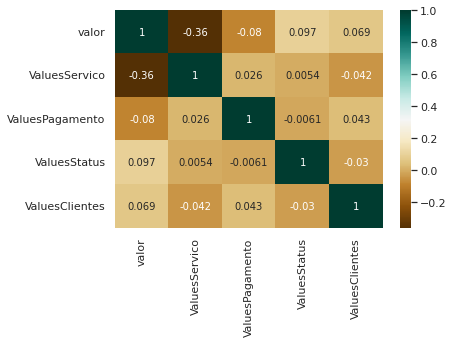

In [ ]:
c= df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

In [ ]:
dfValores = df.groupby(by=['cliente', 'ValuesClientes'])['valor'].sum().reset_index()
dfValores = dfValores.sort_values(by=['valor'], ascending=False, ignore_index=True).head(10)
dfValores['pocento'] = (dfValores['valor']/dfValores['valor'].sum())*100
dfValores
#top 10

,cliente,ValuesClientes,valor,pocento
0,Wallaci Felipe,285,920.0,16.681777
1,Flávio Lemos,102,705.0,12.783318
2,Rauber Bort,242,632.5,11.468722
3,Jonathan Albani,160,515.0,9.338169
4,Cleomar Gomes da Silva,37,490.0,8.884859
5,Nathan Ersico,229,487.5,8.839529
6,Daivid Junior,45,485.0,8.794198
7,Jeferson Júnior,149,465.0,8.431550
8,Guilherme Franceschi,119,410.0,7.434270
9,Roberto Michatowski,250,405.0,7.343608


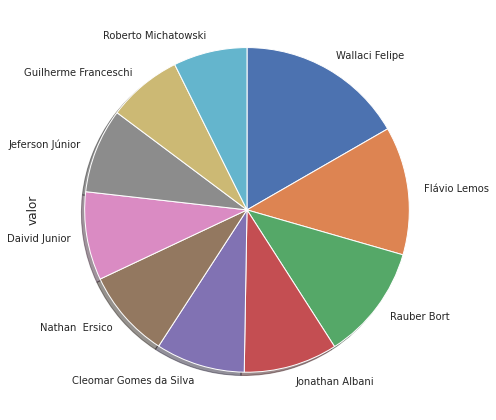

In [ ]:
#Identificar clientes que mais utilizaram os serviços 
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
dfValores.plot(kind='pie', y = 'valor', ax=ax1, counterclock = False, 
 startangle=90, shadow=True, labels=dfValores['cliente'], legend = False, fontsize=10)
